In [1]:
import numpy as np 
# numpy aliased as np
import pandas as pd
# pandas aliased as pd
import matplotlib.pyplot as plt
# matplotlib aliased as plt
import seaborn as sns
# seaborn aliased as sns

In [2]:
df1=pd.read_json('Order_breakdown.json')
print(type(df1))
print(df1.shape)
df1.head()


<class 'pandas.core.frame.DataFrame'>
(8047, 9)


,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


In [3]:
df2=pd.read_table('Order.tsv')
print(type(df2))
print(df2.shape)
df2.head()

<class 'pandas.core.frame.DataFrame'>
(4117, 11)


,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4
2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5
4,AZ-2011-617423,1-5-13,Daniel Burke,Echirolles,France,Central,Home Office,1-7-13,Priority,Auvergne-Rhône-Alpes,2


In [4]:

df3=df1.merge(df2)
print(type(df3))
print(df3.shape)


<class 'pandas.core.frame.DataFrame'>
(8047, 19)


In [90]:
df3.to_csv('Amazing Mart.csv',index=False)
# Explore the data using exel and download the explored data
df=pd.read_csv('Amazing Mart - Amazing Mart.csv')


In [91]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['year']=df['Order Date'].dt.year
df.head()

,Product,Sales,Profit,Quantity,Order Date,Customer Name,City,Country,Region,Ship Date,State,year
0,Enermax,45,-26,3,2013-01-01,Ruby Patel,Stockholm,Sweden,North,1-5-13,Stockholm,2013
1,Dania,854,290,7,2013-01-03,Summer Hayward,Southport,United Kingdom,North,1-7-13,England,2013
2,Binney,140,21,3,2013-01-04,Devin Huddleston,Valence,France,Central,1-8-13,Auvergne-Rhône-Alpes,2013
3,Boston,27,-22,2,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,1-9-13,England,2013
4,Eldon,17,-1,2,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,1-9-13,England,2013


In [92]:
df.drop(df.columns[[4,5,6,7,8,9,10]], axis=1, inplace=True)

In [93]:
df.shape
df.head()

,Product,Sales,Profit,Quantity,year
0,Enermax,45,-26,3,2013
1,Dania,854,290,7,2013
2,Binney,140,21,3,2013
3,Boston,27,-22,2,2013
4,Eldon,17,-1,2,2013


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Product   8047 non-null   object
 1   Sales     8047 non-null   int64 
 2   Profit    8047 non-null   int64 
 3   Quantity  8047 non-null   int64 
 4   year      8047 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 314.5+ KB


In [95]:
df.isnull().sum()

Product     0
Sales       0
Profit      0
Quantity    0
year        0
dtype: int64

In [96]:
df.duplicated().sum()

477

In [97]:
df.drop_duplicates(inplace=True)  

#### Plot sum of  Sales  and mean of Profit based on year without subplots

In [98]:
d1=df.groupby('year').agg({'Sales':['sum'],'Profit':['mean']})
d1

,Sales,Profit
,sum,mean
year,,
2013,404570,37.867435
2014,533554,36.085698
2015,614019,37.205631
2016,729733,32.932127


#### Multiple plots without Subpolts

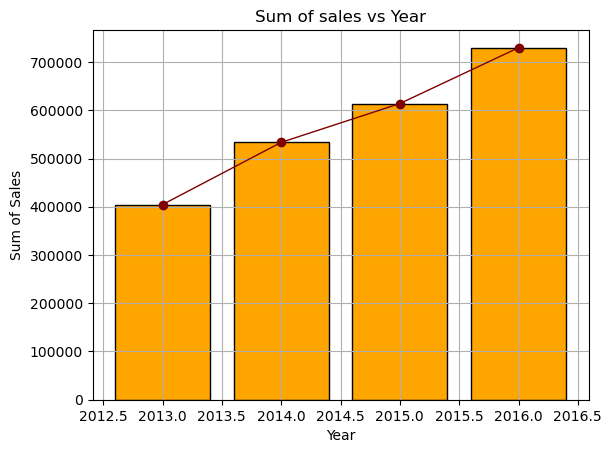

In [99]:
plt.bar(d1.index,d1[('Sales','sum')],color='orange',edgecolor='black')
plt.plot(d1.index,d1[('Sales','sum')],color='maroon',lw=1,marker='o')
plt.xlabel('Year')
plt.ylabel('Sum of Sales')
plt.title('Sum of sales vs Year')
plt.grid()
plt.show()

#### Depict count of top 7 Product Name on countplot

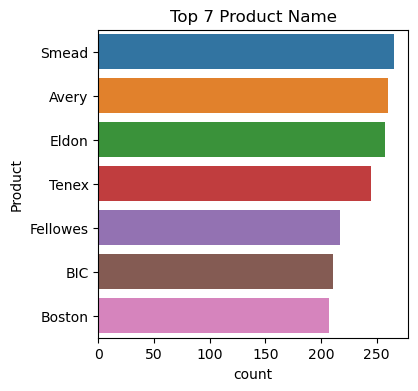

In [100]:
plt.figure(figsize=(4,4))
sns.countplot(y=df['Product'],order=df['Product'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 Product Name')
plt.show()

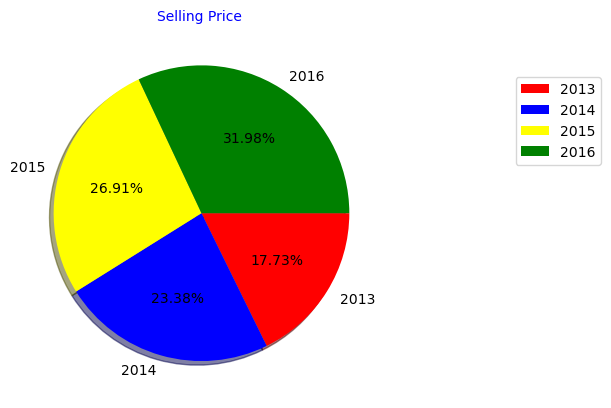

In [102]:
plt.pie(x=d1[('Sales','sum')],labels=d1.index,
       colors=['red','blue','yellow','green','cyan','deeppink','dodgerblue','orange','orange','purple','maroon'],
       autopct='%.2f%%',shadow=True,counterclock=False)
plt.title('Selling Price ',color='blue',fontsize=10)
plt.legend(loc='right',bbox_to_anchor=(1,1,0.6,-0.5))


#### Corelation

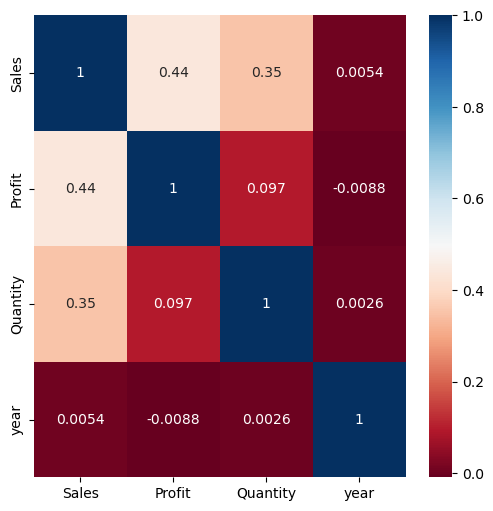

In [103]:
plt.figure(figsize=(6,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [104]:
x=df.drop('Sales',axis=1)
y=df['Sales']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(7570, 4)
(7570,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=19)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(4542, 4)
(4542,)
(3028, 4)
(3028,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [107]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [108]:
def reg_eval_matrics(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2=r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('Rmse',rmse)
    print('R2 score',r2)
       
def mscore(model):
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    

In [109]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [110]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [111]:
x_train.dtypes

Product     object
Profit       int64
Quantity     int64
year         int64
dtype: object

In [112]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
step2=LinearRegression()

pipe_lr=Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr=pipe_lr.predict(x_test)

reg_eval_matrics(y_test,ypred_lr)

mscore(pipe_lr)

MAE 194.33502611970033
MSE 120358.18720593084
Rmse 346.9267749913962
R2 score 0.5092201053164149
Training Score 0.5591357466360165
Testing Score 0.5092201053164149


In [113]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
step2=Ridge(alpha=2.41)

pipe_rid=Pipeline([('step1',step1),('step2',step2)])

pipe_rid.fit(x_train,y_train)

ypred_rid=pipe_rid.predict(x_test)

reg_eval_matrics(y_test,ypred_rid)

mscore(pipe_rid)

MAE 195.6758745228898
MSE 123341.08334354698
Rmse 351.1994922313342
R2 score 0.4970568658538055
Training Score 0.5538066848023137
Testing Score 0.4970568658538055


In [114]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
step2=Lasso(alpha=0.2)

pipe_la=Pipeline([('step1',step1),('step2',step2)])

pipe_la.fit(x_train,y_train)

ypred_la=pipe_la.predict(x_test)

reg_eval_matrics(y_test,ypred_la)

mscore(pipe_la)

MAE 192.32131643502777
MSE 121965.31875042616
Rmse 349.2353343383601
R2 score 0.5026667675796099
Training Score 0.5567305527832428
Testing Score 0.5026667675796099


In [115]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
step2= RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=11,min_samples_split=7)

pipe_rd=Pipeline([('step1',step1),('step2',step2)])

pipe_rd.fit(x_train,y_train)

ypred_rd=pipe_rd.predict(x_test)

reg_eval_matrics(y_test,ypred_rd)

mscore(pipe_rd)

MAE 190.18295904887714
MSE 188858.88044914135
Rmse 434.5789691749261
R2 score 0.22989749506361778
Training Score 0.5270805812417437
Testing Score 0.028731836195508585


In [116]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
step2= DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=8)

pipe_dt=Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt=pipe_dt.predict(x_test)

reg_eval_matrics(y_test,ypred_dt)

mscore(pipe_dt)

MAE 176.23183619550858
MSE 175907.14398943196
Rmse 419.4128562519656
R2 score 0.282710286642058
Training Score 0.020695728753852928
Testing Score 0.013540290620871863


In [118]:
step1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0])],remainder='passthrough')
step2= AdaBoostClassifier()

pipe_ad=Pipeline([('step1',step1),('step2',step2)])

pipe_ad.fit(x_train,y_train)

ypred_ad=pipe_ad.predict(x_test)

reg_eval_matrics(y_test,ypred_ad)

mscore(pipe_ad)

MAE 229.22853368560106
MSE 229664.77410832234
Rmse 479.2335277381189
R2 score 0.06350489097548007
Training Score 0.011448701012769706
Testing Score 0.007926023778071334


#### Save and Load the  Model

In [119]:
import pickle

In [120]:
pickle.dump(pipe_lr,open('lr_model.pkl','wb'))
pickle.dump(df,open('data.pkl','wb'))

In [121]:
df.head(20)

,Product,Sales,Profit,Quantity,year
0,Enermax,45,-26,3,2013
1,Dania,854,290,7,2013
2,Binney,140,21,3,2013
3,Boston,27,-22,2,2013
4,Eldon,17,-1,2,2013
5,Binney,90,21,3,2013
6,Sanford,207,77,4,2013
7,Bush,155,36,1,2013
8,Accos,33,2,3,2013
9,Smead,716,143,4,2013


In [122]:
df['year'].value_counts()

2016    2431
2015    1989
2014    1762
2013    1388
Name: year, dtype: int64